In [31]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [32]:
t_0 = 0
dt = 0.1 # Bước lưới h
N = 1000 # Số bước thời gian cần tính
y_0 = np.array([5.2, 3.6]) # Điều kiện ban đầu 

def F(y, t): # Hàm f(y, x)
    ans = np.copy(y)
    ans[0] = y[0] * (1-y[0]/45) - 0.5*y[0]*y[1]/(1+y[0]**2)
    ans[1] = y[0]*y[1] + 0.3*y[0]*y[1]/(1+y[0]**2)
    #ans[1] = -0.4*y[1] + 0.35*y[0]**2*y[1]/(1+y[0]**2)
    return ans


In [33]:
k = 3  # number of top and last

In [34]:
# RK 1
Euler_Forward = np.array([[0, 0],
                          [1, 1]])

# RK2
Midpoint = np.array([[0, 0, 0],
                     [1/2, 1/2, 0],
                     [1, 0, 1]])
Euler_Improve = np.array([[0, 0, 0],
                          [1, 1, 0],
                          [1, 1/2, 1/2]])

# RK3
Simpson = np.array([[0, 0, 0, 0],
                    [1/2, 1/2, 0, 0],
                    [1, -1, 2, 0],
                    [1, 1/6, 2/3, 1/6]])
Heun = np.array([[0, 0, 0, 0],
                 [1/3, 1/3, 0, 0],
                 [2/3, 0, 2/3, 0],
                 [1, 1/4, 0, 3/4]])

#RK4
Original = np.array([[0, 0, 0, 0, 0],
                     [1/2, 1/2, 0, 0, 0],
                     [1/2, 0, 1/2, 0, 0],
                     [1, 0, 0, 1, 0],
                     [1, 1/6, 1/3, 1/3, 1/6]])
Rule_3_8 = np.array([[0, 0, 0, 0, 0],
                     [1/3, 1/3, 0, 0, 0],
                     [2/3, -1/3, 1, 0, 0],
                     [1, 1, -1, 1, 0],
                     [1, 1/8, 3/8, 3/8, 1/8]]) 

In [35]:
def RK(y, t, Butcher_Table):
    vector_y = np.array([y])
    vector_t = np.array([t])
    n = 0
    s = len(Butcher_Table) - 1
    B = Butcher_Table[1:, 1:]
    alpha = Butcher_Table[1:, 0]

    while n < N:
        K = np.ones((s, len(y)))
        K[0] = dt * F(vector_y[-1], vector_t[-1])
        for i in range(1, s):
            K[i] = dt * F(vector_y[-1] + np.dot(B[i-1], K), vector_t[-1] + alpha[i-1]*dt)
        vector_y = np.vstack((vector_y, vector_y[-1] + np.dot(B[-1], K)))
        vector_t = np.append(vector_t, t+dt)
        n += 1
        t += dt

    return vector_y, vector_t


In [36]:
ans_y, ans_t = RK(y_0, t_0, Midpoint)

t =  0.1 :	 Y[ 1 ]^T =  [5.63560382 6.08524041]
t =  0.2 :	 Y[ 2 ]^T =  [ 6.08015025 10.70092705]
t =  0.3 :	 Y[ 3 ]^T =  [ 6.51374756 19.57346649]
...
t =  99.8 :	 Y[ 998 ]^T =  [ 1.38103371 73.94838843]
t =  99.9 :	 Y[ 999 ]^T =  [-0.27424673 79.5096541 ]
t =  100.0 :	 Y[ 1000 ]^T =  [-1.06852635 81.70968101]


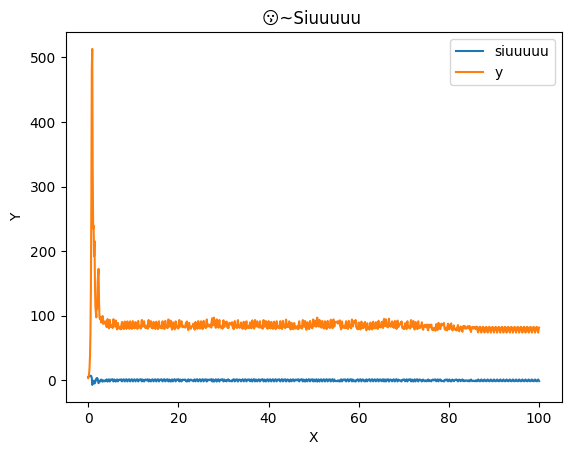

In [37]:
for i in range(k):
    print("t = ", round(ans_t[i+1], 3), ":\t Y[", i+1, "]^T = " , ans_y[i+1])

print("...")

for i in range(k):
    print("t = ", round(ans_t[-k+i], 3), ":\t Y[", N-k+i+1, "]^T = ", ans_y[-k+i])

# Vẽ đồ thị
ans_y = np.transpose(ans_y)

# Muốn vẽ gì thì sửa ở đây
#plt.plot(ans_t, ans_y[0] - np.exp(-1*ans_t), label = 'Sai số') # Vẽ y_0 theo t
plt.plot(ans_t, ans_y[0], label = 'siuuuuu') # Vẽ y_1 theo t
plt.plot(ans_t, ans_y[1], label = 'y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('😗~Siuuuuu ')
plt.show()